In [220]:
# exmaple 1
original_tubes = [
          ['p','b','r','p'],
          ['y','g','g','r'],
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
          ['0']*4,  ['0']*4
]

In [232]:
# exmaple 2
original_tubes = [
          ['y','g','g','r'],
          ['p','b','r','p'],
          ['0']*4,  ['0']*4,
          ['p','y','y','r'],
          ['b','g','r','p'],
          ['b','b','y','g'],
]

In [228]:
# exmaple 3
original_tubes = [
          ['lb','y','o','lg'],
          ['lb','g','y','dg'],
          ['p','lg','r','db'],
          ['y','lb','r','dp'],
          ['dg','lp','db','y'],
          ['b','dg','b','g'],
          ['b','db','p','r'], # one row
          ['p','lp','db','b'],
          ['dp','lp','lg','dp'],
          ['dg','dp','p','r'],
          ['o','lg','g','lb'],
          ['lp','o','g','o'],
          ['0']*4, ['0']*4
]

In [200]:
def copytubes(tubes):
  new_tubes = [list(tube) for tube in tubes]
  return new_tubes

In [201]:
def nonEmptyIndex(tube):
  i=0
  while i in range(len(tube)):
    if tube[i] != '0':
      break
    i+=1
  return i

In [202]:
def check_transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)

  if t1_indx == len(tube1):  # tube1 should not be empty
    return False
  elif t2_indx == 0:  # tube2 should not be full
    return False

  t1_colr = tube1[t1_indx]
  if t2_indx < len(tube2):  # if tube not empty
    t2_colr = tube2[t2_indx]
    if t1_colr != t2_colr:  # check if color matches
      return False
  else:   # if tube empty
    if allSame([tube1]):  # if all same
      return False

  return True

In [203]:
def transfer(tube1,tube2):

  # check if colr matches
  t1_indx = nonEmptyIndex(tube1)
  t2_indx = nonEmptyIndex(tube2)
  t1_colr = tube1[t1_indx]


  if t2_indx < len(tube2):  # if tube not empty
    t2_colr = tube2[t2_indx]
    # calc chunk size
    chunk_size = 1
    i = t2_indx + 1
    while i < len(tube2) and tube2[i] == t2_colr:
      chunk_size += 1
      i += 1
  else:
    chunk_size = 0

  i = t1_indx;  j = t2_indx-1
  while i in range(len(tube1)):
    if (tube1[i] != t1_colr) or (i == len(tube1)):
      break
    tube2[j - (i-t1_indx)] = tube1[i]
    tube1[i] = '0'
    i+=1
    chunk_size += 1

  return tube1,tube2, chunk_size

In [204]:
def allSame(tubes):
  same = True
  colrs = []
  for tube in tubes:
    t_indx = nonEmptyIndex(tube)
    if t_indx == len(tube):  # all same if tube empty
      continue

    colr1 = tube[t_indx]
    colrs.append(colr1)
    t_indx += 1
    while t_indx in range(len(tube)):
      if tube[t_indx] != colr1:
        return False
      t_indx += 1

  if len(colrs) > len(set(colrs)):
    return False
  return same

In [205]:
def printMoves(moves):
  if moves is not None:
    for k,(i,j) in enumerate(moves):
      print("move:%d -> transfer tube%d to tube%d"%(k+1,i+1,j+1))
  else:
    print("failed")

### sequential backtracking

In [214]:
def seq_backtrack(original_tubes):
  tubes = copytubes(original_tubes)
  solved = False
  tubes_state = []

  run=0; max_moves=0
  while True:
    if allSame(tubes):
      solved = True
      break
    possible_moves = []

    # transfer from tube1 to tube2
    for i in range(len(tubes)):
      for j in range(i+1,len(tubes)):
        tube1, tube2 = tubes[i], tubes[j]        
        if check_transfer(tube1, tube2):
          # pass a copy of the list so that the original is not changed after the transfer
          _, _, chunk_size = transfer(list(tube1),list(tube2))
          #print("move:%d -> transfer tube%d to tube%d"%(move_indx,i+1,j+1))
          move = (i,j)
          possible_moves.append((move, chunk_size))
        # check transfer in reverse order
        if check_transfer(tube2, tube1):
          _, _, chunk_size = transfer(list(tube2),list(tube1))
          #print("move:%d -> transfer tube%d to tube%d"%(move_indx,j+1,i+1))
          move = (j,i)
          possible_moves.append((move, chunk_size))
      # end loop for tube to be transferred to
    # end loop for tube to be transferred from

    if len(possible_moves) == 0:   # stuck having checked all possibilities
      while True:
        tubes, possible_moves, move_choice = tubes_state[-1]    # get the last state and its moves
        move_choice += 1 
        if move_choice == len(possible_moves):  # exhausted all possible moves
          del tubes_state[-1]
        else:
          move, _ = possible_moves[move_choice]
          tubes_state[-1][2] = move_choice   # update the move choice
          i, j = move
          tube1, tube2 = tubes[i], tubes[j]
          transfer(tube1,tube2)
          break
    else:
      # pick the move which results in the biggest chunk
      possible_moves.sort(key=lambda x:x[1], reverse=True)
      move = possible_moves[0]
      tubes_state.append([copytubes(tubes), possible_moves, 0])
      # sending original tubes instead of copy to transfer function
      i, j = move[0]
      tube1, tube2 = tubes[i], tubes[j]
      transfer(tube1,tube2)

    if len(tubes_state) > max_moves:
      max_moves = len(tubes_state)
    if run%1000==0:
      print("run %d, max_moves = %d"%(run,max_moves))
    run += 1
      
  if solved:
    moves = []
    for _, possible_moves, move_choice in tubes_state:
        moves.append(possible_moves[move_choice][0])
    return moves
  else:
    return None

### sequential incremental

In [218]:
def seq_increment(original_tubes):  
  tubes = copytubes(original_tubes)
  solved = False
  move_indx = 0
  moves = []

  for k in range(1000):
    if allSame(tubes):
      solved = True
      break
    transferred = False

    # transfer from tube1 to tube2
    for i in range(len(tubes)):
      for j in range(i+1,len(tubes)):
        tube1, tube2 = tubes[i], tubes[j]
        if check_transfer(tube1, tube2):
            transfer(tube1,tube2)
            moves.append((i,j))
            transferred = True
            break
        elif check_transfer(tube2, tube1):
            transfer(tube2,tube1)
            moves.append((j,i))
            transferred = True
            break
      if transferred:
        break
    if not transferred:
      break
      
  if solved:
    return moves
  else:
    return None

In [225]:
import numpy as np
from tqdm.notebook import tqdm

### random search

In [226]:
def random_search(original_tubes, n_runs=1000, check_all=False):
  run_moves = []

  for run in tqdm(range(n_runs)):
    tubes = copytubes(original_tubes)
    moves_tested = []
    moves = []
    solved = False
    
    move_indx = 1
    
    while True:
      if allSame(tubes):
        #print("run %d : done"%(run))
        solved = True
        break
      # transfer from tube1 to tube2
      if len(moves_tested) == np.math.factorial(len(tubes))/(2*np.math.factorial(len(tubes)-2)):
        break
      while True:
        i,j = np.random.choice(range(len(tubes)),2,replace=False)
        if (i,j) not in moves_tested and (j,i) not in moves_tested:
          moves_tested.append((i,j))
          break

      tube1, tube2 = tubes[i], tubes[j]
      if check_transfer(tube1,tube2):
        transfer(tube1,tube2)
        moves.append((i,j))
        move_indx += 1
        moves_tested = []
      elif check_transfer(tube2,tube1):
        transfer(tube2,tube1)
        moves.append((j,i))
        move_indx += 1
        moves_tested = []
    if not solved:
      #print("run %d : failed"%(run))
      continue
    run_moves.append(moves)
    if not check_all:
      print("found a solution in run %d"%(run));
      break
  if check_all:
    print("all runs completed\n")  

  if len(run_moves) > 0:
    move_lens = [len(moves) for moves in run_moves]
    min_run = move_lens.index(min(move_lens))
    best_moves = run_moves[min_run]
    return best_moves
  else:
    return None

In [234]:
moves = seq_backtrack(original_tubes)
printMoves(moves)

run 0, max_moves = 1
move:1 -> transfer tube7 to tube3
move:2 -> transfer tube6 to tube3
move:3 -> transfer tube1 to tube7
move:4 -> transfer tube1 to tube6
move:5 -> transfer tube6 to tube4
move:6 -> transfer tube1 to tube6
move:7 -> transfer tube6 to tube1
move:8 -> transfer tube4 to tube6
move:9 -> transfer tube7 to tube4
move:10 -> transfer tube6 to tube7
move:11 -> transfer tube2 to tube6
move:12 -> transfer tube2 to tube3
move:13 -> transfer tube1 to tube2
move:14 -> transfer tube2 to tube1
move:15 -> transfer tube5 to tube2
move:16 -> transfer tube4 to tube5
move:17 -> transfer tube2 to tube6


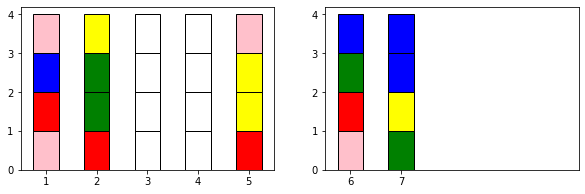

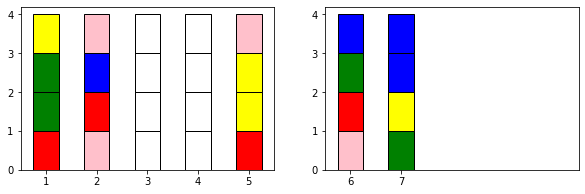

move:1 -> transfer tube7 to tube3


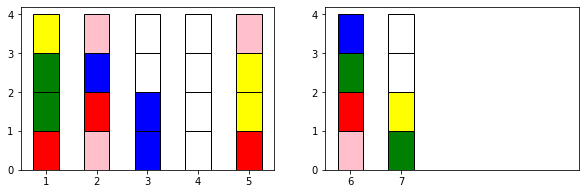

move:2 -> transfer tube6 to tube3


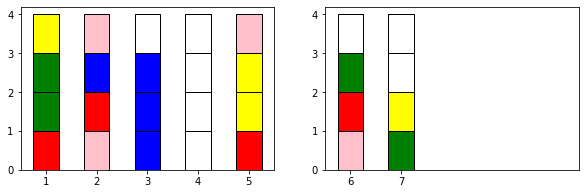

move:3 -> transfer tube1 to tube7


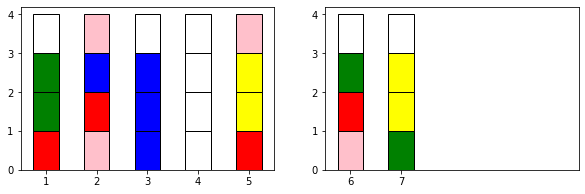

move:4 -> transfer tube1 to tube6


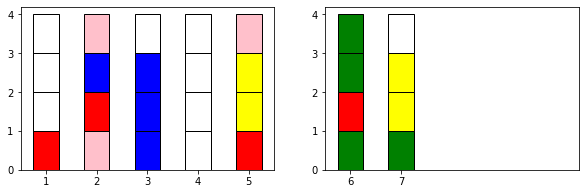

move:5 -> transfer tube6 to tube4


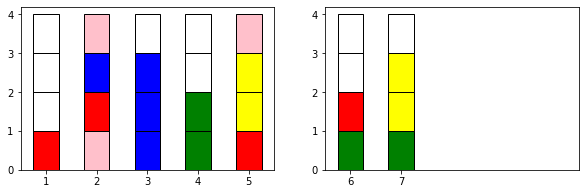

move:6 -> transfer tube1 to tube6


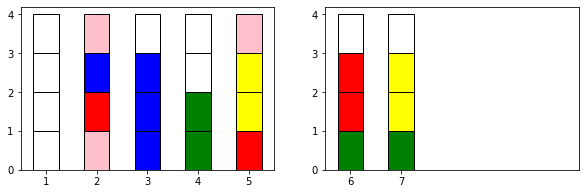

move:7 -> transfer tube6 to tube1


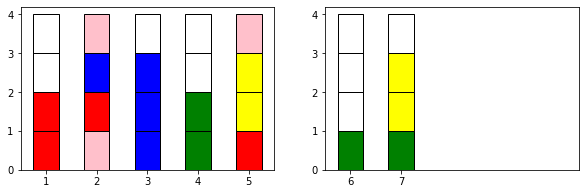

move:8 -> transfer tube4 to tube6


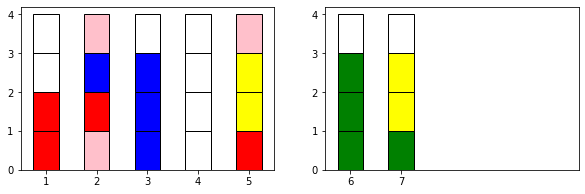

move:9 -> transfer tube7 to tube4


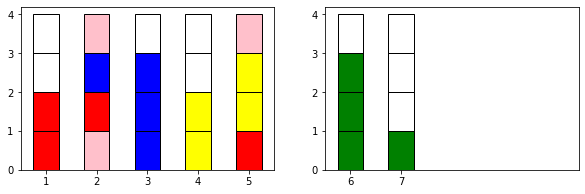

move:10 -> transfer tube6 to tube7


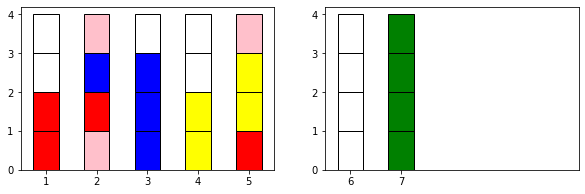

move:11 -> transfer tube2 to tube6


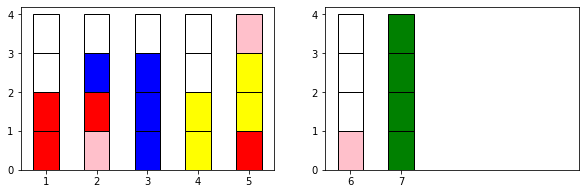

move:12 -> transfer tube2 to tube3


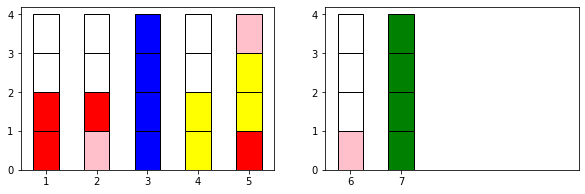

move:13 -> transfer tube1 to tube2


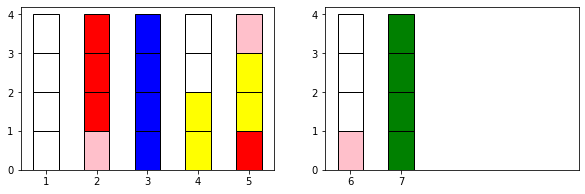

move:14 -> transfer tube2 to tube1


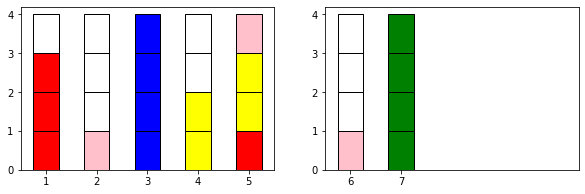

move:15 -> transfer tube5 to tube2


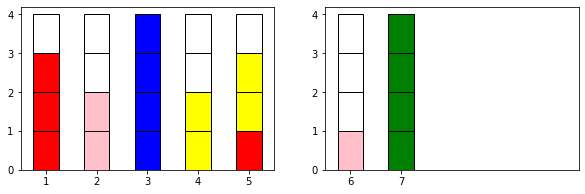

move:16 -> transfer tube4 to tube5


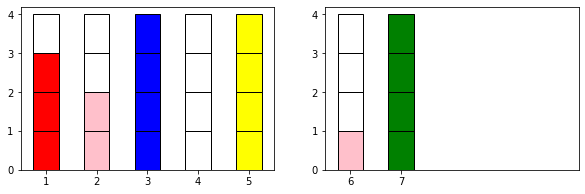

move:17 -> transfer tube2 to tube6


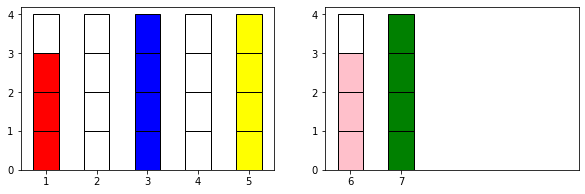

In [236]:
from ColorSort import playGame, replaceColors

colrs = {'p':"pink", 'b':"blue", 'r':"red", 'y':"yellow", 'g':"green"}
tubes = replaceColors(original_tubes, colrs)
playGame(tubes, moves)